# Logistic Regression - breast cancer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

print(df.shape)
df.tail()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


# 2. EDA

### Pair plot with mean features

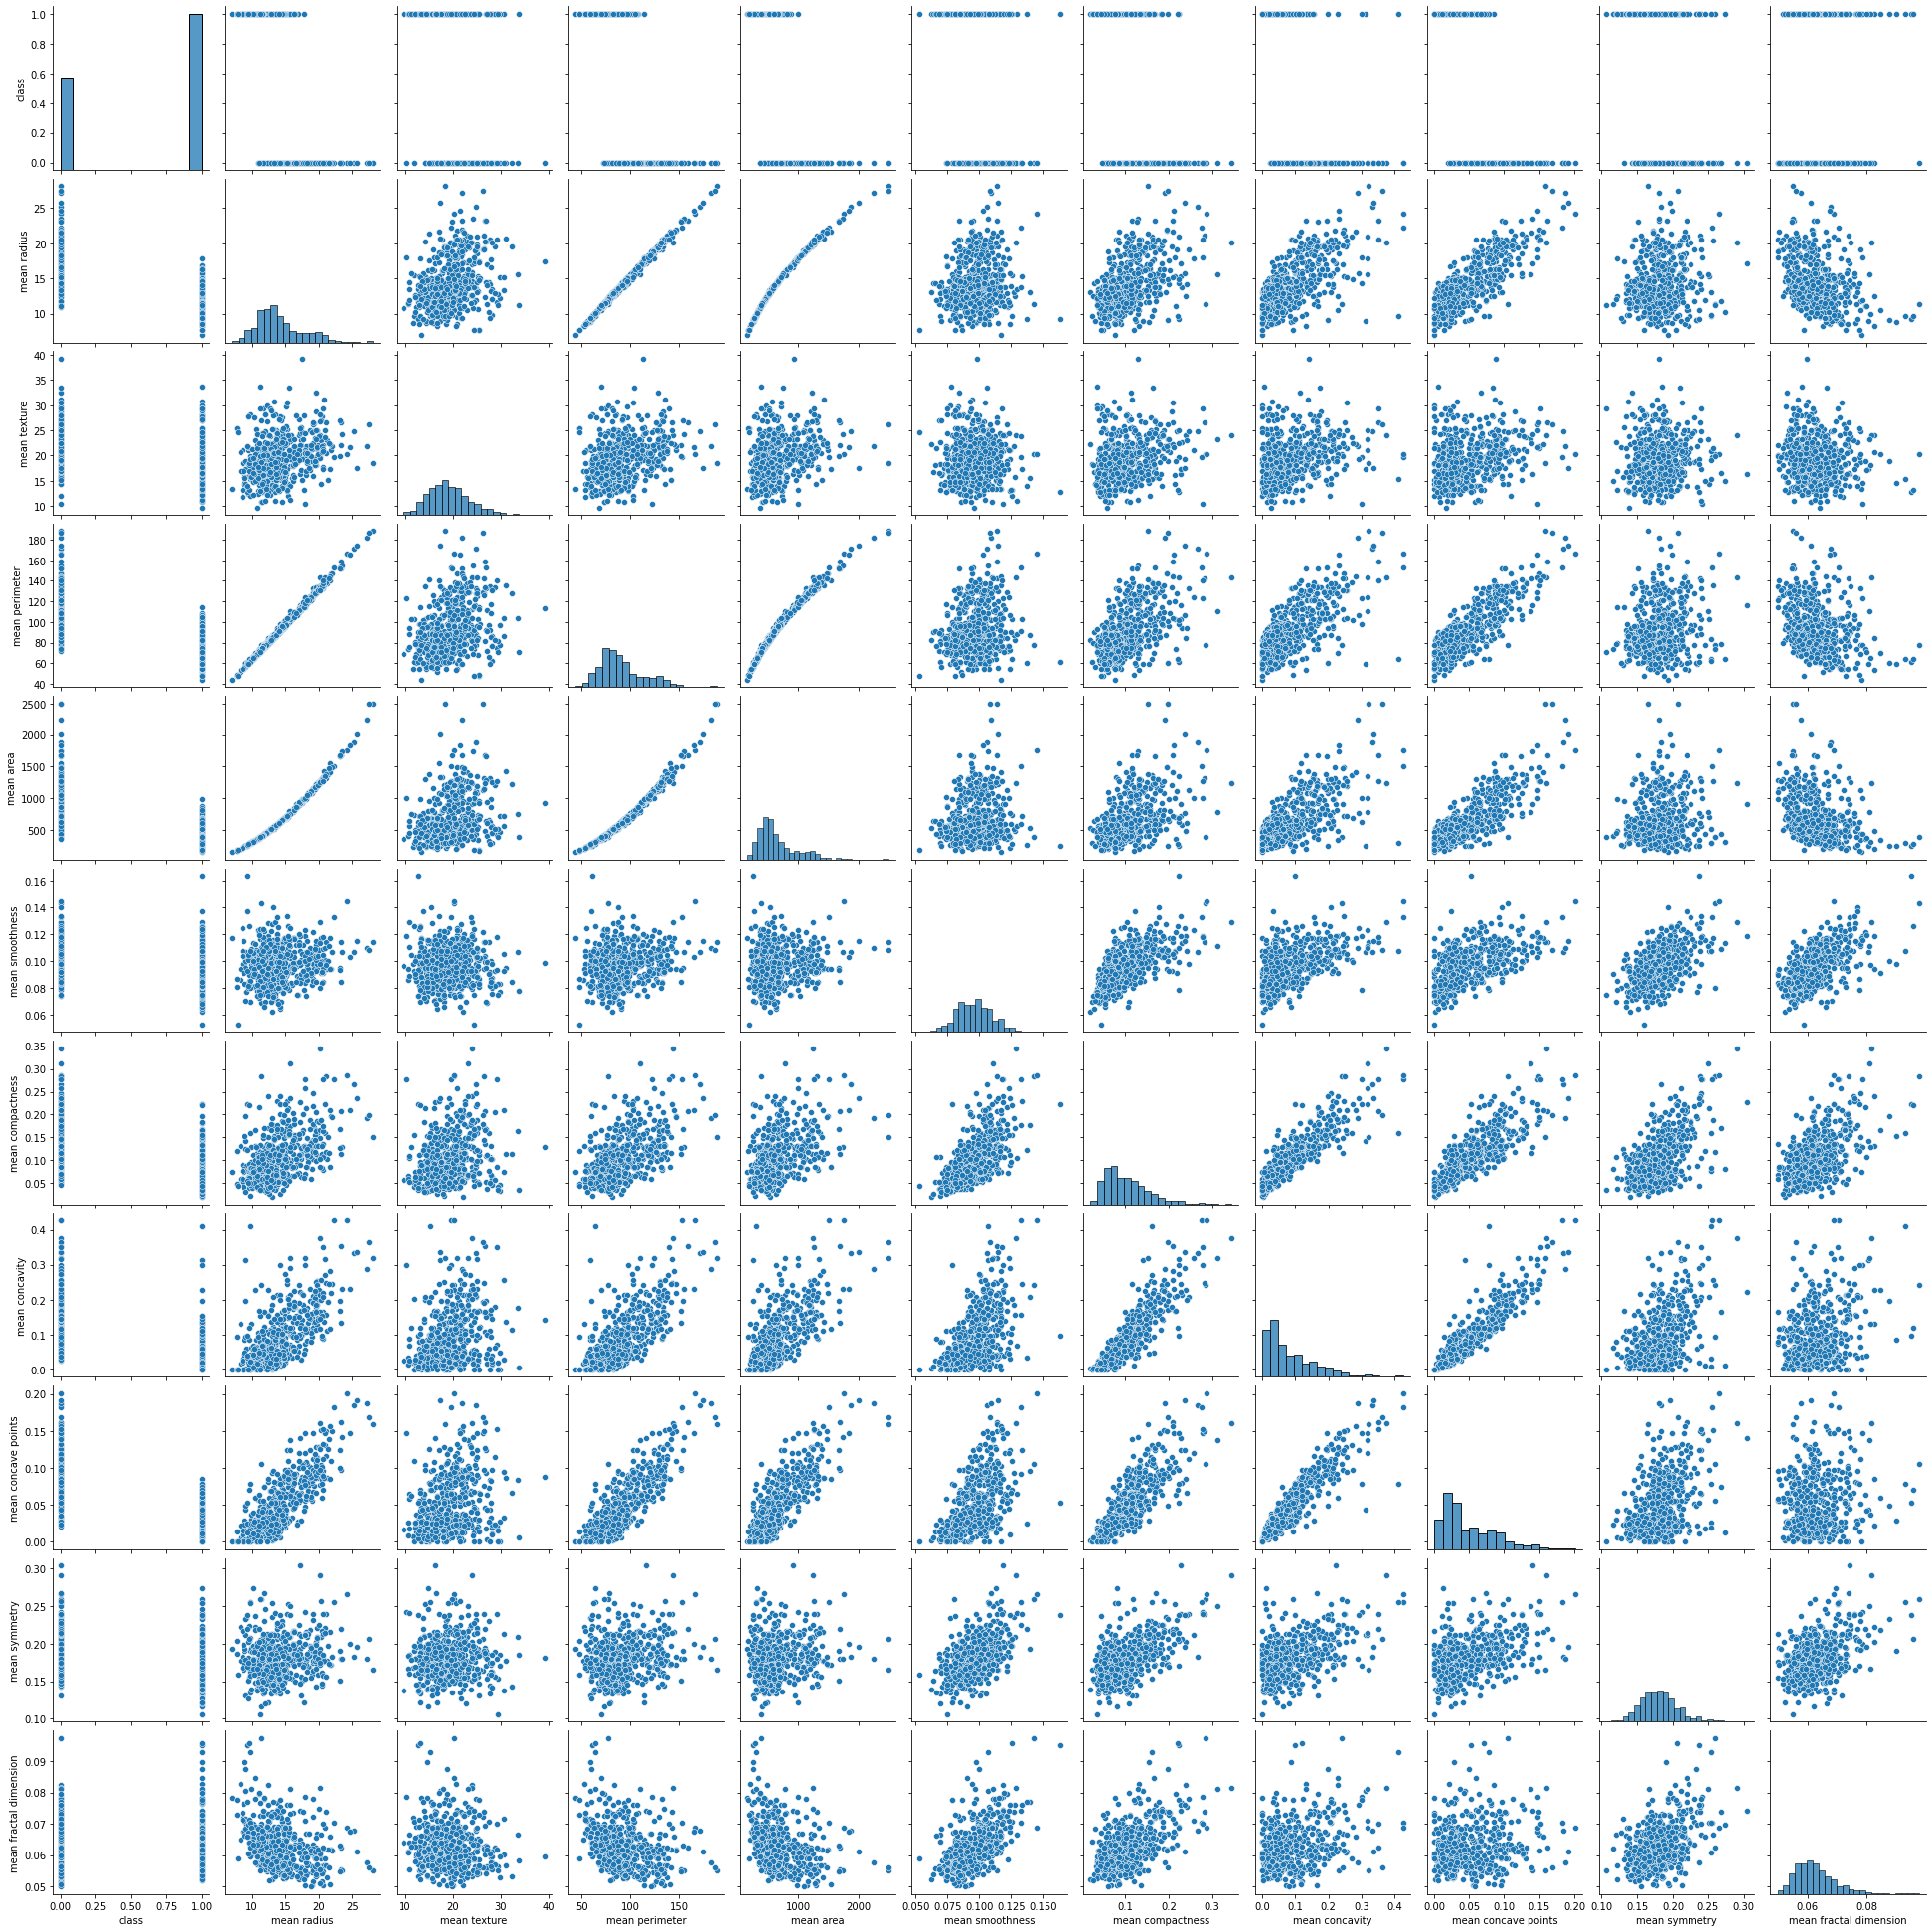

In [5]:
# 데이터 pairplot 그려보기 1
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

### Pair plot with std features

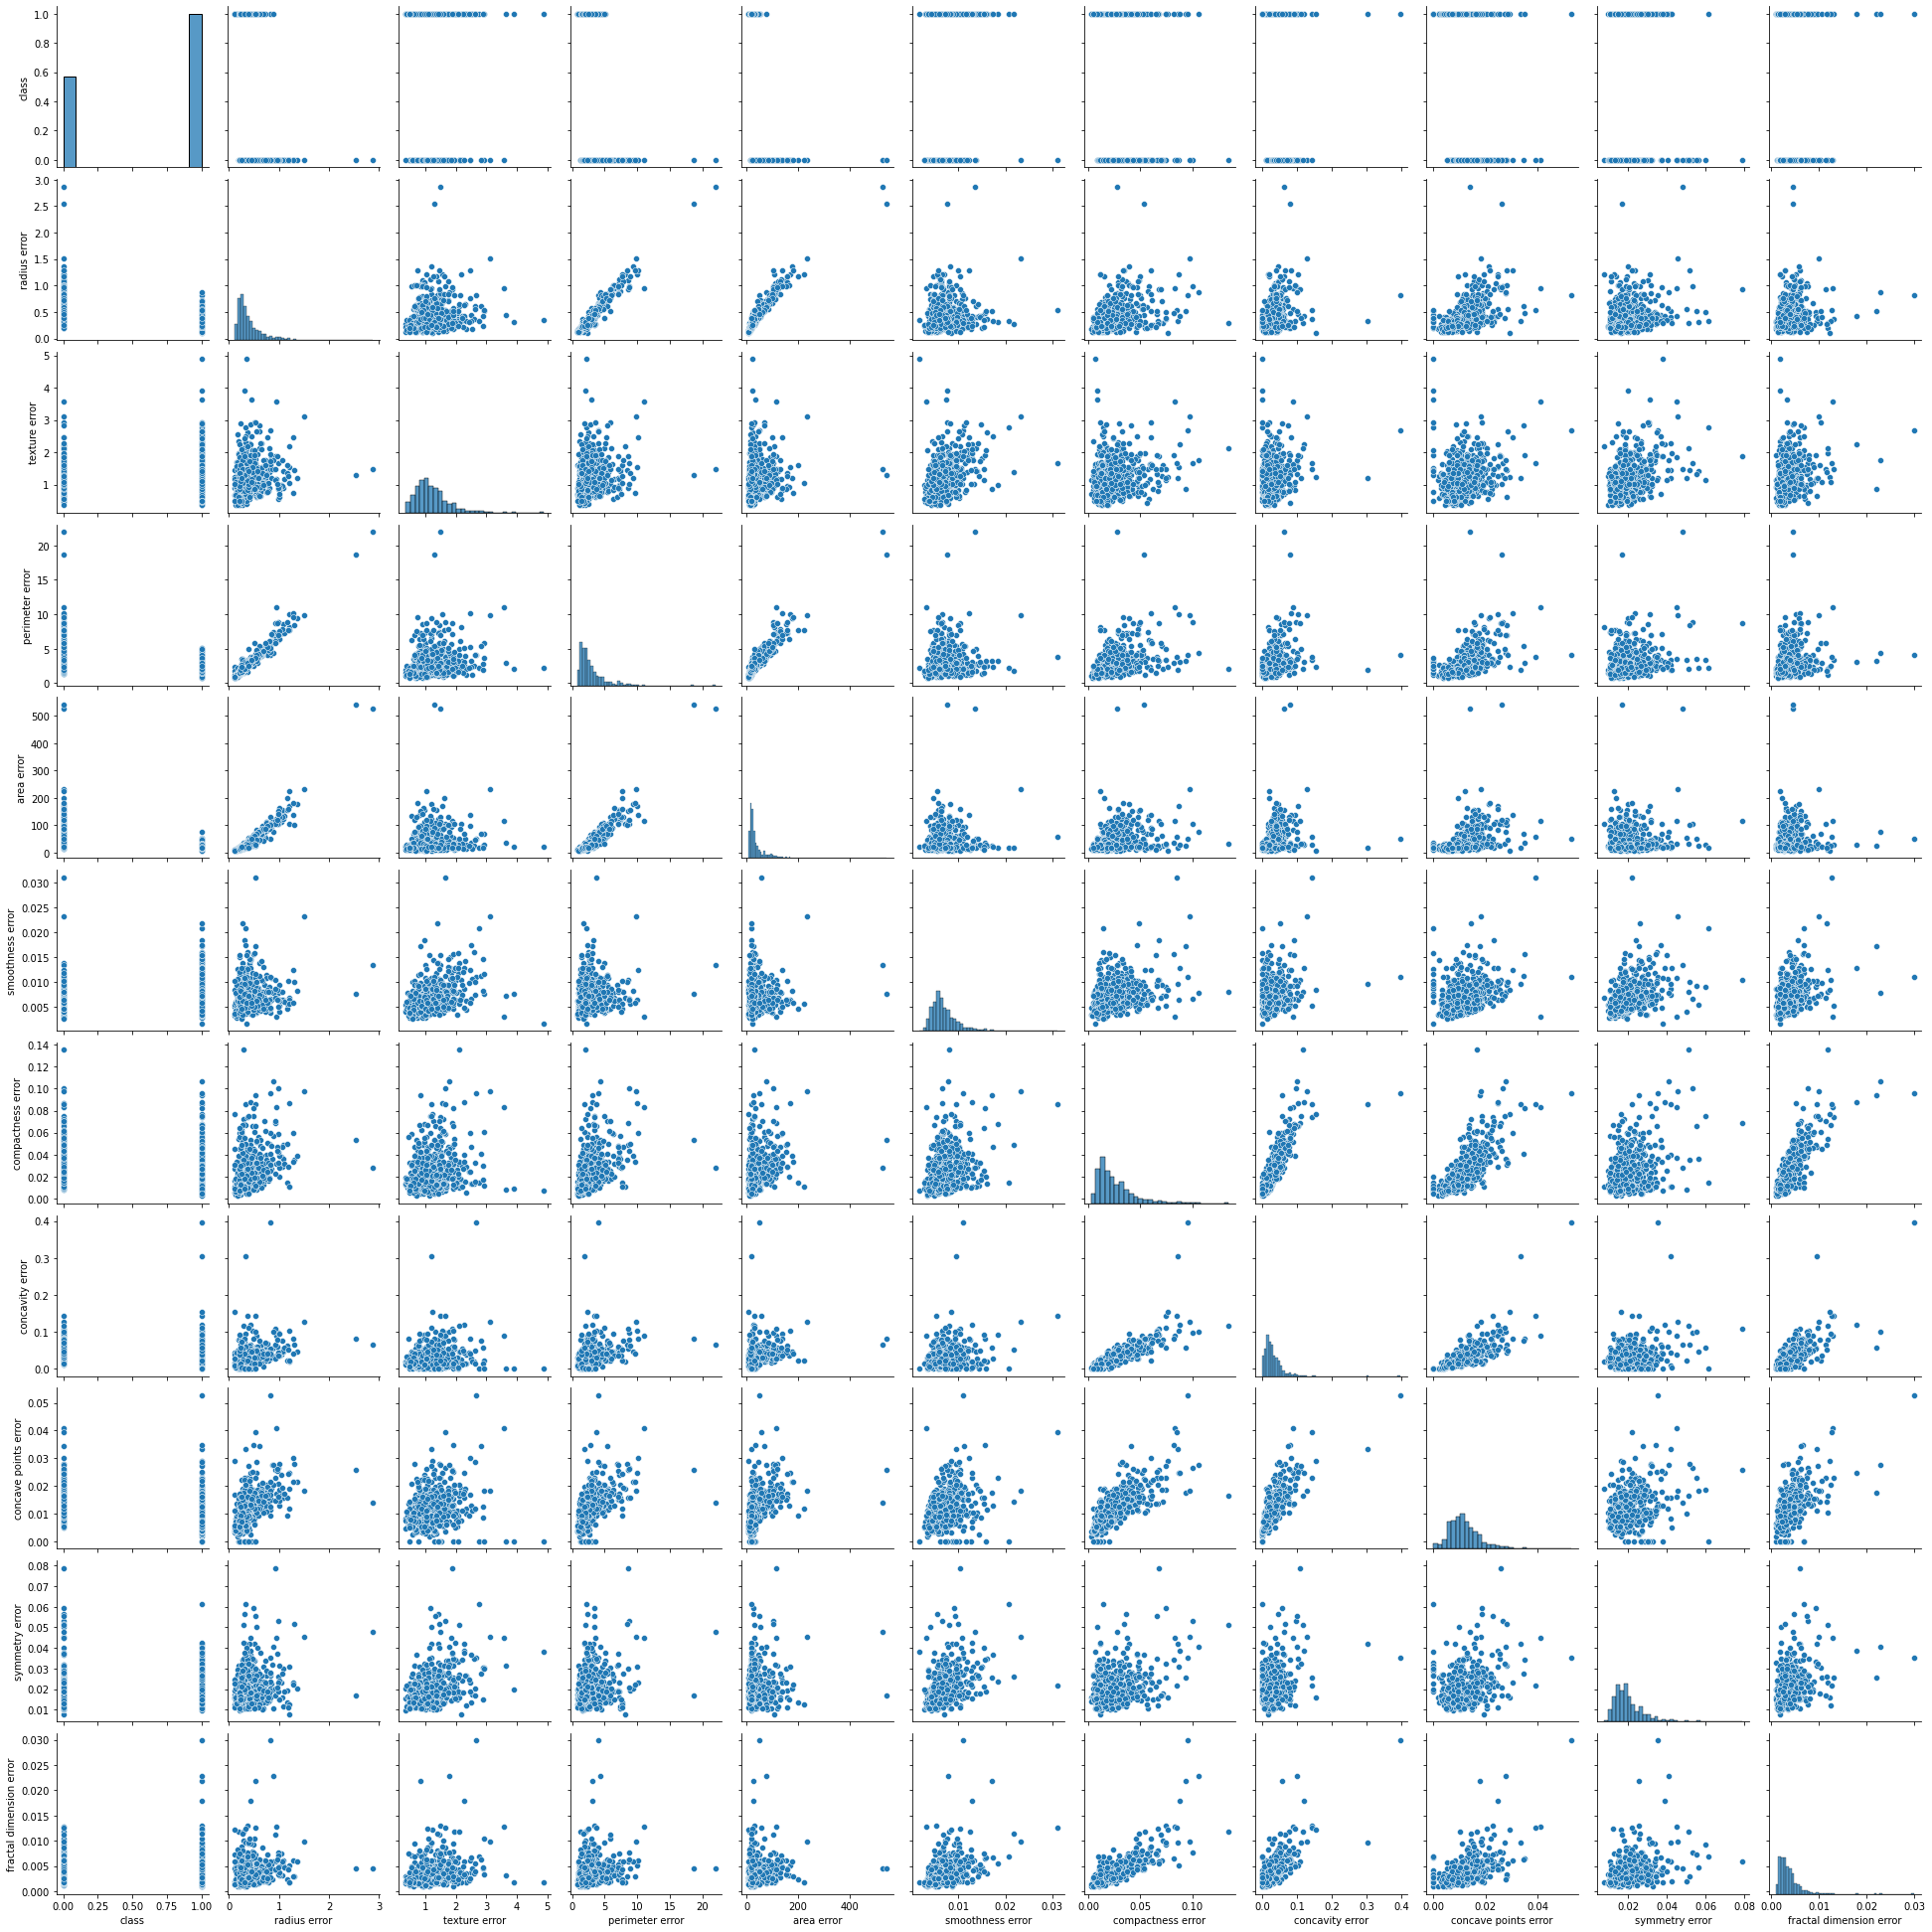

In [6]:
# 데이터 pairplot 그려보기 2
sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

### Pair plot with worst features

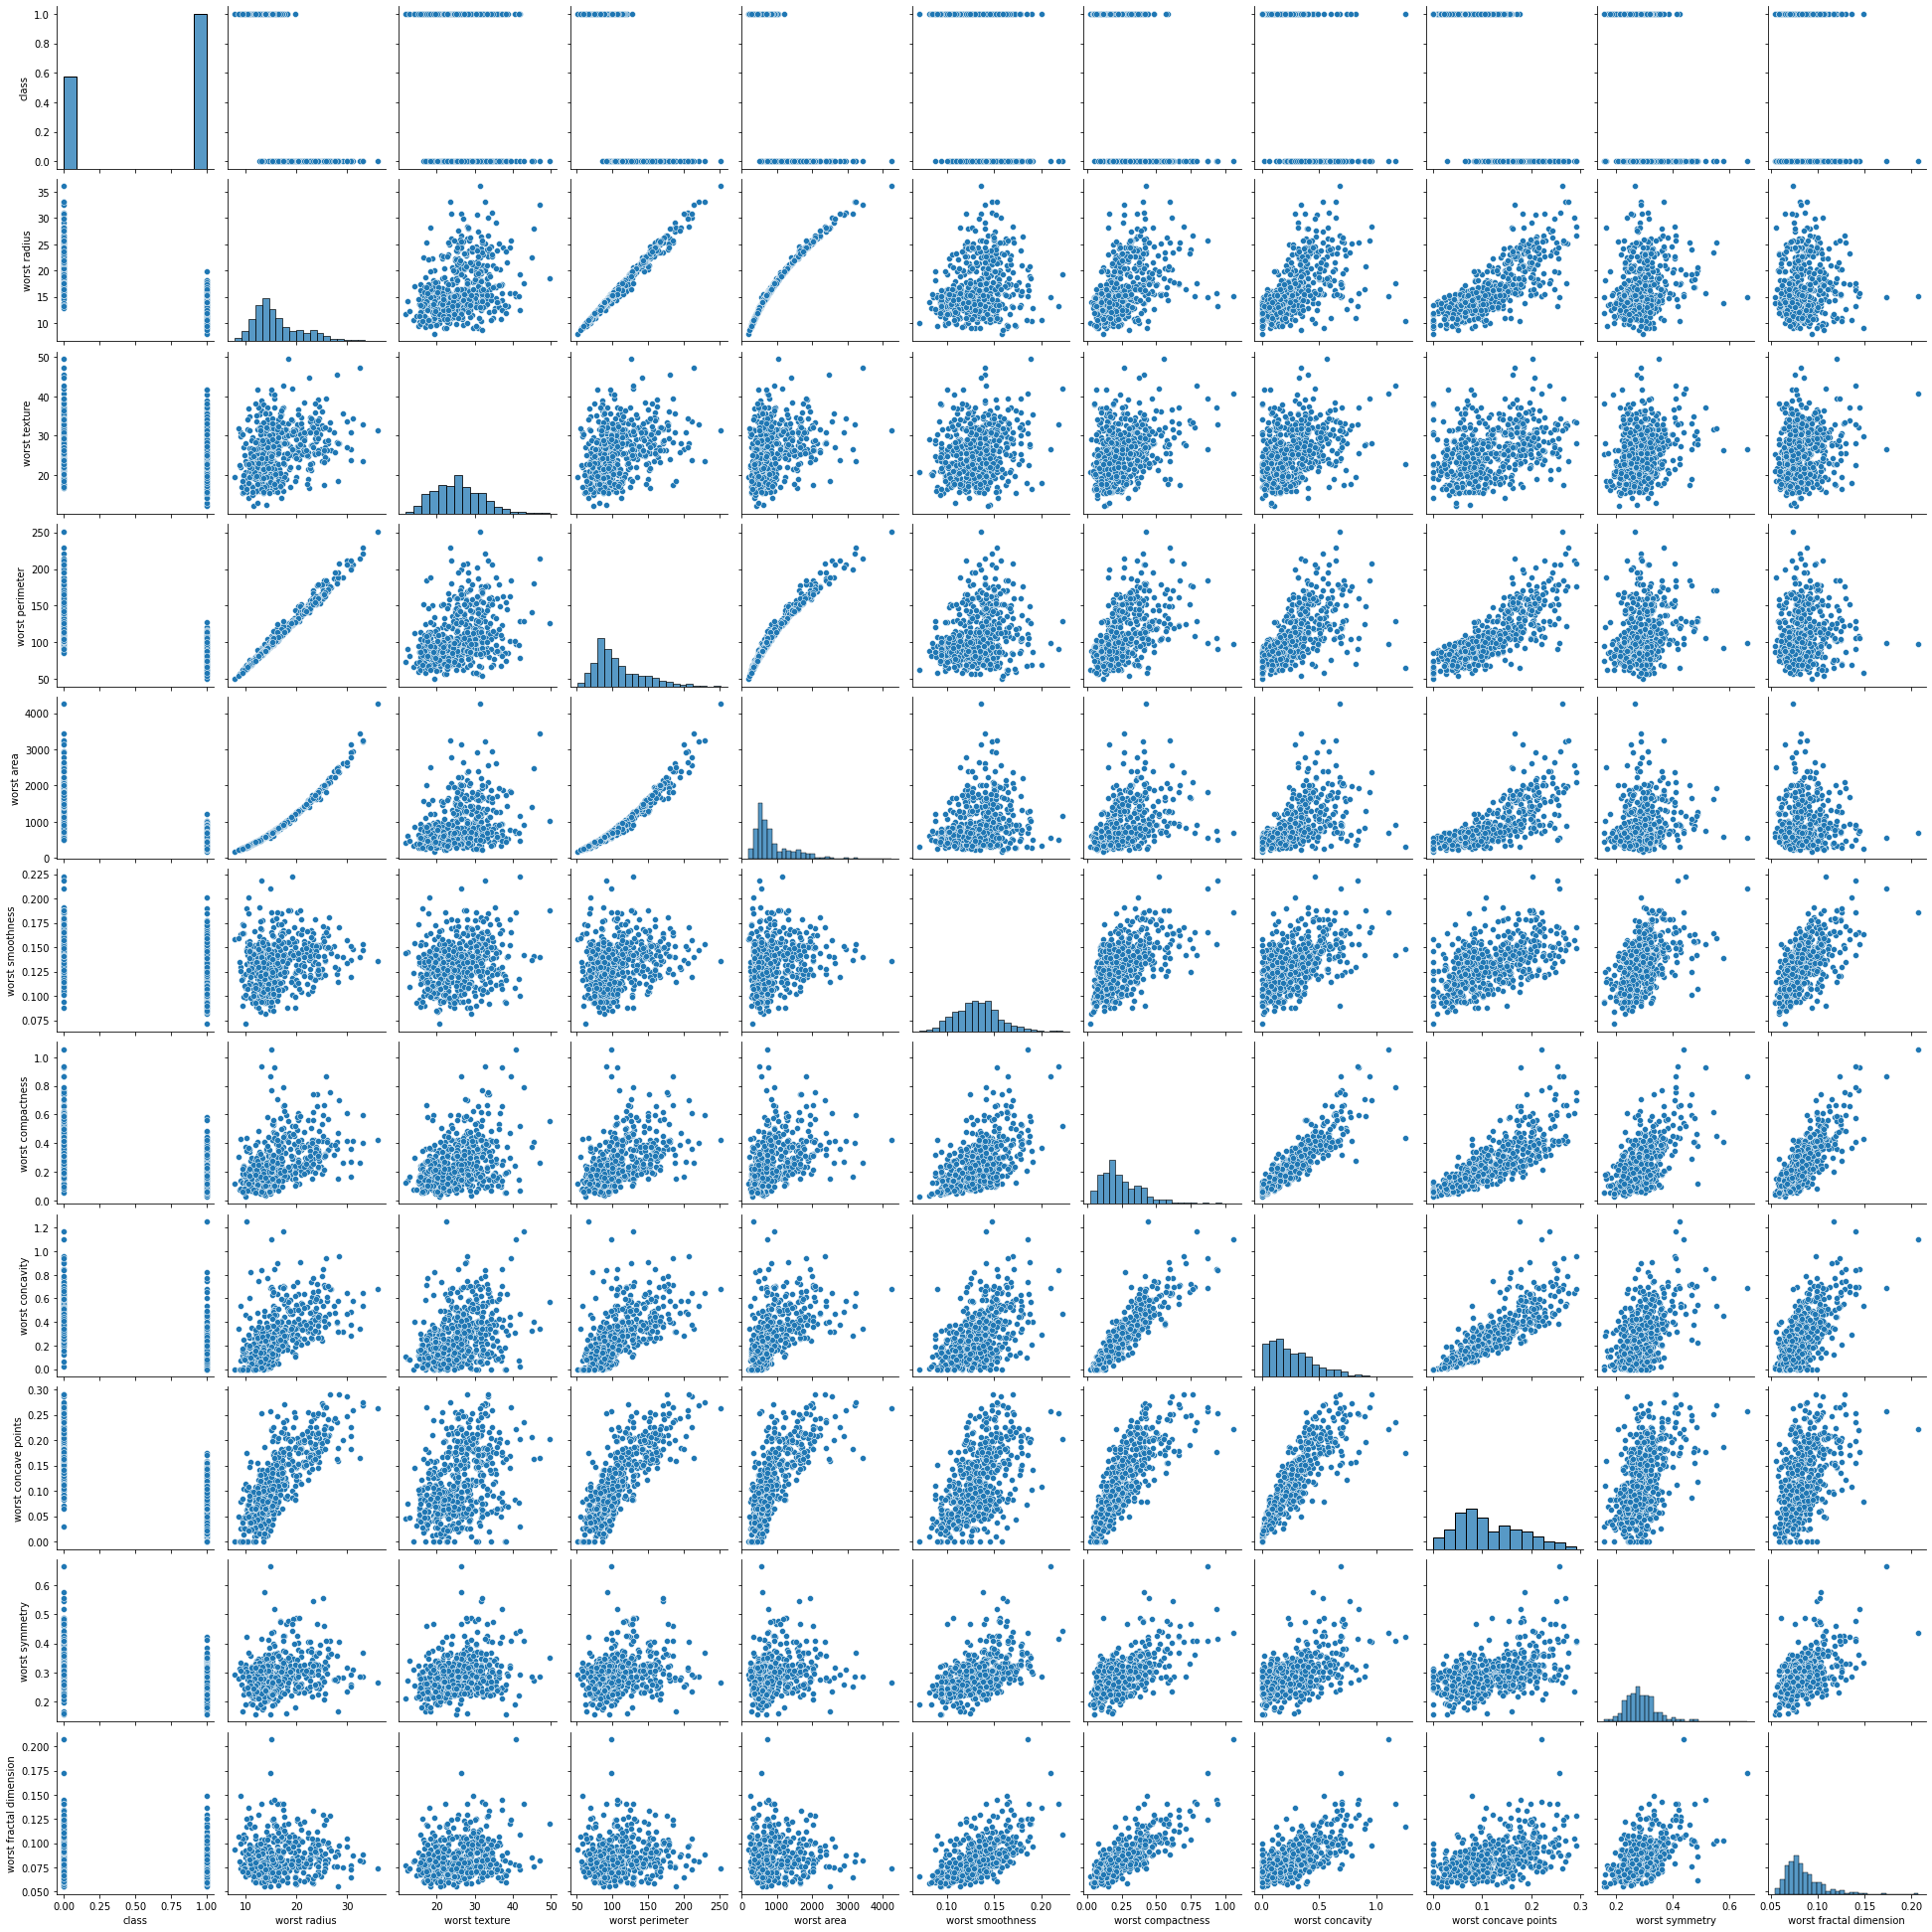

In [7]:
# 데이터 pairplot 그려보기 3
sns.pairplot(df[['class'] + list(df.columns[20:30])])
plt.show()

In [9]:
# 모델에 사용할 피처 10개 선택
cols = ["mean radius", "mean texture",
        "mean smoothness", "mean compactness", "mean concave points",
        "worst radius", "worst texture",
        "worst smoothness", "worst compactness", "worst concave points",
        "class"]
print(len(cols))
cols

11


['mean radius',
 'mean texture',
 'mean smoothness',
 'mean compactness',
 'mean concave points',
 'worst radius',
 'worst texture',
 'worst smoothness',
 'worst compactness',
 'worst concave points',
 'class']

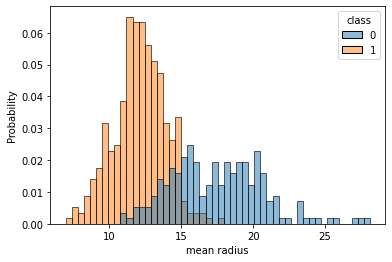

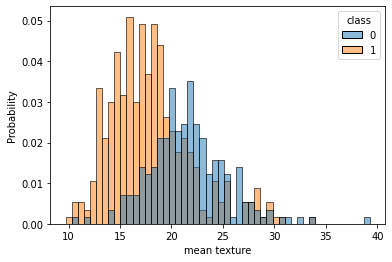

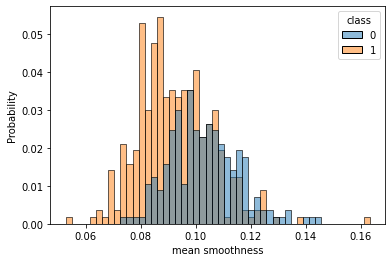

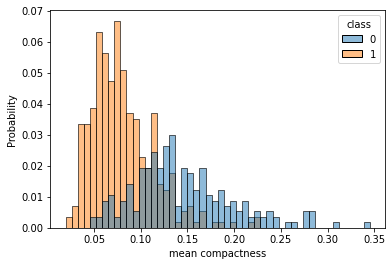

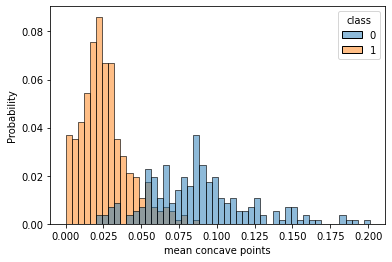

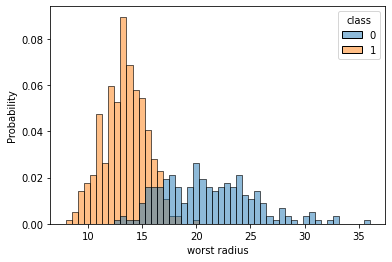

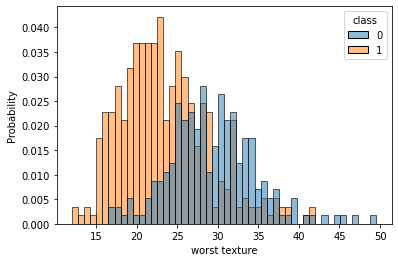

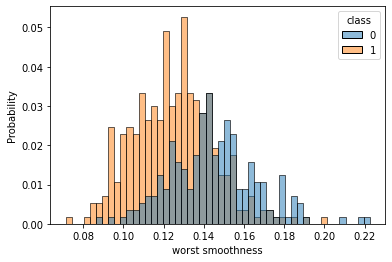

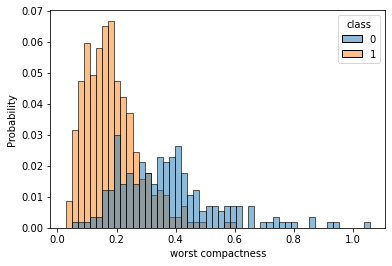

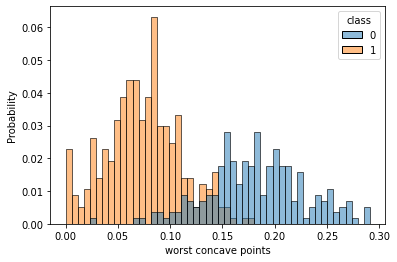

In [10]:
# 생존/사망이 잘 분리되면 좋은 피처이다.
for c in cols[:-1]:
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

# 3. 로지스틱 회귀 with PyTorch

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [12]:
# 데이터를 넘파이 형태로 변환 후 torch tensor로 변환
data = torch.from_numpy(df[cols].values).float()

data.shape
data

tensor([[17.9900, 10.3800,  0.1184,  ...,  0.6656,  0.2654,  0.0000],
        [20.5700, 17.7700,  0.0847,  ...,  0.1866,  0.1860,  0.0000],
        [19.6900, 21.2500,  0.1096,  ...,  0.4245,  0.2430,  0.0000],
        ...,
        [16.6000, 28.0800,  0.0846,  ...,  0.3094,  0.1418,  0.0000],
        [20.6000, 29.3300,  0.1178,  ...,  0.8681,  0.2650,  0.0000],
        [ 7.7600, 24.5400,  0.0526,  ...,  0.0644,  0.0000,  1.0000]])

In [14]:
# 피처와 타깃값으로 분리
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [15]:
print(x.size())
print(x.size(-1))   # input_dim = 10
x

torch.Size([569, 10])
10


tensor([[17.9900, 10.3800,  0.1184,  ...,  0.1622,  0.6656,  0.2654],
        [20.5700, 17.7700,  0.0847,  ...,  0.1238,  0.1866,  0.1860],
        [19.6900, 21.2500,  0.1096,  ...,  0.1444,  0.4245,  0.2430],
        ...,
        [16.6000, 28.0800,  0.0846,  ...,  0.1139,  0.3094,  0.1418],
        [20.6000, 29.3300,  0.1178,  ...,  0.1650,  0.8681,  0.2650],
        [ 7.7600, 24.5400,  0.0526,  ...,  0.0900,  0.0644,  0.0000]])

In [16]:
print(y.size())
print(y.size(-1))   # output_dim = 1
y

torch.Size([569, 1])
1


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
      

In [17]:
# Define configurations.
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [19]:
# 파라미터 W, b를 학습하는 클래스
class MyModel(nn.Module):    # nn.Module 클래스 상속받기
    
    # 생성될 객체에 매개변수 입력
    def __init__(self, input_dim, output_dim):   # 객체 생성 시 인자로 (입력 차원, 출력 차원)
        self.input_dim = input_dim               # 입력 차원
        self.output_dim = output_dim             # 출력 차원
        
        super().__init__()   # nn.Module 클래스의 __init__ 메소드 호출
        
        self.linear = nn.Linear(input_dim, output_dim)   # nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()                          # nn.Sigmoid()
        
    def forward(self, x):
        # |x| = (batch_size, input_dim)   = (569, 10)
        y = self.act(self.linear(x)) 
        # |y| = (batch_size, output_dim)  = (569, 1)
        
        return y

In [20]:
# MyModel 클래스의 객체 생성
model = MyModel(input_dim=x.size(-1),    # input_dim = 10
                output_dim=y.size(-1))   # output_dim = 1
model

MyModel(
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (act): Sigmoid()
)

In [21]:
# 오차함수로 BCELoss
crit = nn.BCELoss()
crit

BCELoss()

In [22]:
# optimizer로 SGD
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [23]:
# 로지스틱 회귀 학습
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)
    
    optimizer.zero_grad()  # 모델 parameter들의 기울기(미분값)를 0으로 초기화
    loss.backward()        # loss 함수 미분
    
    optimizer.step()       # 파라미터 𝜽 업데이트
    
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 10000: loss=2.7342e-01
Epoch 20000: loss=2.2638e-01
Epoch 30000: loss=1.9817e-01
Epoch 40000: loss=1.7967e-01
Epoch 50000: loss=1.6671e-01
Epoch 60000: loss=1.5713e-01
Epoch 70000: loss=1.4977e-01
Epoch 80000: loss=1.4394e-01
Epoch 90000: loss=1.3919e-01
Epoch 100000: loss=1.3525e-01
Epoch 110000: loss=1.3193e-01
Epoch 120000: loss=1.2908e-01
Epoch 130000: loss=1.2662e-01
Epoch 140000: loss=1.2446e-01
Epoch 150000: loss=1.2255e-01
Epoch 160000: loss=1.2085e-01
Epoch 170000: loss=1.1933e-01
Epoch 180000: loss=1.1795e-01
Epoch 190000: loss=1.1670e-01
Epoch 200000: loss=1.1556e-01


In [24]:
y

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
      

In [25]:
y_hat

tensor([[3.4419e-06],
        [9.6987e-04],
        [5.9826e-04],
        [1.5174e-02],
        [8.5302e-02],
        [2.0343e-01],
        [1.0320e-03],
        [7.1973e-02],
        [1.2178e-01],
        [6.1923e-03],
        [5.7301e-02],
        [1.3947e-03],
        [2.2877e-02],
        [7.6913e-01],
        [1.8337e-01],
        [8.8704e-03],
        [1.5033e-02],
        [6.4580e-04],
        [1.1587e-06],
        [9.4540e-01],
        [9.5080e-01],
        [9.9950e-01],
        [6.2333e-02],
        [2.2747e-07],
        [1.0541e-07],
        [5.0964e-04],
        [8.6371e-03],
        [3.5277e-02],
        [1.9629e-04],
        [1.6434e-01],
        [1.7106e-04],
        [6.2851e-03],
        [2.4242e-03],
        [3.3074e-05],
        [2.5930e-03],
        [1.2876e-02],
        [4.5471e-01],
        [9.9704e-01],
        [9.8980e-01],
        [3.9330e-01],
        [4.9850e-01],
        [8.2180e-01],
        [1.2371e-05],
        [2.7473e-02],
        [1.2292e-01],
        [8

## Let's see the result!

In [27]:
# accuracy 확인
correct_cnt = (y == (y_hat > .5)).sum()   # 맞춘 갯수들을 다 더한다.
total_cnt = float(y.size(0))              # 전체 갯수

print('Accuracy: %.4f' % (correct_cnt / total_cnt))  # accuracy : 전체 갯수 중 맞춘 갯수 비율

Accuracy: 0.9666


In [28]:
# y와 y_hat을 데이터프레임으로 만들기
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])
print(df.shape)
df

(569, 2)


,y,y_hat
0,0.0,3.441892e-06
1,0.0,9.698675e-04
2,0.0,5.982612e-04
3,0.0,1.517376e-02
4,0.0,8.530204e-02
...,...,...
564,0.0,4.992647e-04
565,0.0,8.287102e-04
566,0.0,4.549071e-02
567,0.0,8.860666e-07


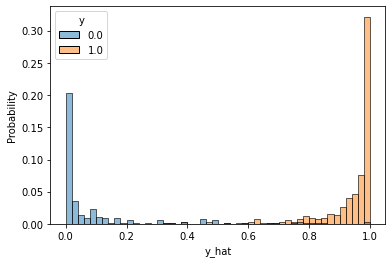

In [29]:
sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()